In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from geopy.distance import great_circle
#from shapely.geometry import MultiPoint, Point
#import hvplot
#import geopandas as gpd
#import networkx as nx 


In [434]:
# load GPS DATA

path1 = 'https://raw.githubusercontent.com/acigna/corona_personal_walk_tracking/master/personal_walk.csv'
path2 = 'https://raw.githubusercontent.com/acigna/corona_personal_walk_tracking/master/personal_walk2.csv'

positions = pd.read_csv(path1)
positions1 = pd.read_csv(path2)
positions = positions.append(positions1)
#print(positions.iloc[1,3])
#positions = positions[:600]
mat=pd.DataFrame(columns=['lat','lon'])
mat['lat']= positions.lat.values
mat['lon']= positions.lon.values
#print(mat)
#plt.plot(mat['lon'], mat['lat'], c = 'red')
#plt.show

In [435]:
# compute speed 

mat_x = positions.lat.values
mat_y = positions.lat.values
time_step = 1
n = len(mat_x) # nombre de positions

speed = np.zeros(n)
for j in range (1,n):
        dist_x =mat_x[j]-mat_x[j-1]
        dist_y = mat_y[j]-mat_y[j-1]
        speed[j]= np.sqrt((dist_x**2+dist_y**2)/(time_step)**2)
        
#print(speed)



In [436]:
mat['speed'] = speed
#mat['time']= positions.time.values
print(mat.shape)

(2378, 3)


1.414213377927898e-07


(array([2.367e+03, 5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.00021735, 0.0004347 , 0.00065205, 0.0008694 ,
        0.00108675, 0.0013041 , 0.00152145, 0.0017388 , 0.00195615,
        0.0021735 ]),
 <a list of 10 Patch objects>)

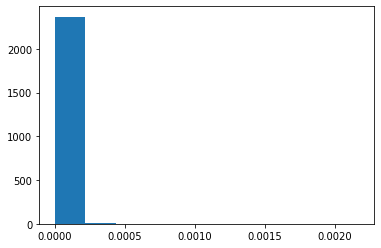

In [437]:

# get an idea about different speeds
np.unique(speed)
idx_speed = np.where(speed == 0)
vect = speed[speed != 0]
             
speed_min = vect.min()

print(speed_min)
plt.hist(speed)

In [438]:
# find zones center
centre_zone = pd.DataFrame(columns = ['lat','lon'])
mat['speed'] = speed
#mat['time']= positions.time.values
print(mat.shape)

 ## case speed == 0
for i in range(len(mat)):
    if mat.speed[i] == 0 :
        print(i)
        centre_zone = centre_zone.append(mat.iloc[i])#, mat.lon[i])
        
print(centre_zone)

 ## case of non-zero and equal speed for several individuals
    




0
109
396
499
522
527
532
583
1932
1954
2086
            lat       lon  speed
0     36.771243  3.300146    0.0
109   36.771975  3.302384    0.0
396   36.772039  3.301109    0.0
499   36.771985  3.301858    0.0
522   36.771982  3.301918    0.0
527   36.771981  3.301923    0.0
532   36.771981  3.301927    0.0
583   36.771972  3.302320    0.0
1932  36.772886  3.302267    0.0
1954  36.772919  3.302054    0.0
2086  36.773099  3.300918    0.0


In [ ]:
#filtred_mat=mat[mat.speed<0.0000005]
#print(filtred_mat.shape)

In [453]:
# input of DBSCAN (positions)
X = np.array([mat.lat,mat.lon]) #,mat.speed])
X=X.T
print(X)
#X= np.radians(X) # tronsfomation on Radians


[[36.7712434  3.3001456]
 [36.7712581  3.30014  ]
 [36.7712635  3.3001314]
 ...
 [36.7726814  3.3004567]
 [36.7726736  3.3004513]
 [36.7726662  3.300447 ]]


In [440]:
# distance min 
earth_radius_km = 6371
epsilon = 0.002/ earth_radius_km #calculate 2 meter epsilon threshold


[-0.04524618970337207, -0.07288516747337509, 0.11037863045550829, 0.059410010433065555, 0.2111157874391392, 0.11061828027145802, 0.09830313628379063, 0.04121650227071956, -0.010070778538310964, -0.07487058950386286, -0.12646131222768686, -0.20576960218731866, -0.24264553008277873, -0.3269434299759302, -0.3864281512459294, -0.4080728473216882, -0.40568665004437, -0.40254563112808894, -0.43499297339237863, -0.45141514665023164, -0.3717501400162317, -0.3958845834214944, -0.4071115401308748, -0.4117712814011342, -0.4256491845080187, -0.20110150156528694, -0.20193971417822285]


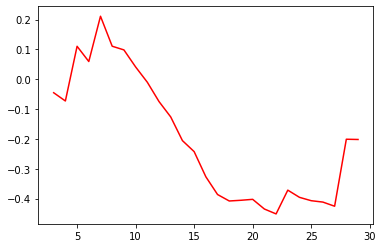

In [441]:
# optimisation 
# find the silhouette max 
i=0
silhouette=[]
for sample in range(3,30): # variate number of compountes in one cluster
    db = DBSCAN(eps= 0.0000005, min_samples= sample).fit(X)
    labels = db.labels_
    silhouette.append(metrics.silhouette_score(X, labels))
    
print(silhouette)

y=range(3,30)
plt.plot(y,silhouette,c='red')


In [442]:
# find the number of compount of DBSCAN

S_metrics = np.array(silhouette)
metric_max = (S_metrics).max()
indx_max = np.where(S_metrics == np.amax(S_metrics))
y = np.array(y) # range of variation  
number_compounts_DBSCAN = y[indx_max]

print (metric_max, indx_max)
print (number_compounts_DBSCAN)

0.2111157874391392 (array([4], dtype=int64),)
[7]


In [462]:

#db = DBSCAN(eps= 0.0000005, min_samples= number_compounts_DBSCAN).fit(X)
#labels = db.labels_

db = DBSCAN(eps=0.0000005, min_samples=15).fit(np.radians(X))
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

print(db.core_sample_indices_)
print(core_samples_mask)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))



[  31   32   33   34   35   36   37   38   39   40   41   42   43   44
   45   46   47   48   49   50   51   52   53   54   55   56   57   58
   59   60   61   62   63   64   65   66   67   68   69   72   73   74
   75   76   81   82   83   86   87   88   89   90   91   92   93   94
   95   96   97   98   99  100  101  102  103  104  105  106  107  108
  109  110  111  112  113  114  115  116  117  118  119  120  121  124
  125  126  127  129  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  195  196  197  198  199  200  201  202  203  204  205  206
  207  208  209  210  211  212  213  214  277  278  279  280  281  282
  283  284  285  286  287  288  289  290  291  292  293  294  295  296
  297  298  299  300  301  302  303  304  305  306  307  308  309  310
  311  312  313  314  315  316  317  318  319  320  321  322  323  324
  325 

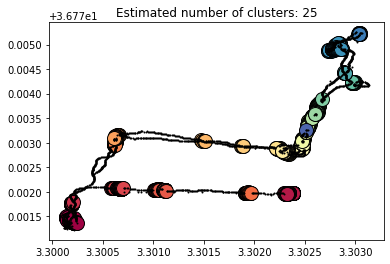

In [463]:
# plot results

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
